<a href="https://colab.research.google.com/github/Farazmghm/fraud_detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Description
This project focuses on developing a machine learning model to detect fraudulent banking transactions. In today's fast-paced financial systems, the ability to identify suspicious activity in real-time is crucial for preventing fraud and safeguarding user assets. The goal is to leverage ML algorithms to build a reliable fraud detection system capable of distinguishing between legitimate and fake transactions.

📂 Dataset Overview
The dataset consists of 20 features related to each transaction, capturing information such as:

Transaction details: ID, amount, type, timestamp

Account data: balance, user ID

Device & location data: device type, geographic location, IP flag

Historical behavior: previous fraud history, daily count, failed transactions

Card & authentication: card type, card age, auth method

Contextual features: risk score, transaction distance, weekend flag

Target Variable: Fraud_Label

1: Fraudulent transaction

0: Genuine transaction

🧠 Tasks and Workflow
✅ 1. Data Preprocessing
Encode categorical features using LabelEncoder

Handle invalid or missing data

Normalize numerical features for optimal model performance

✅ 2. Model Training
Trained and compared several ensemble-based machine learning algorithms:

Gradient Boosting

XGBoost

LightGBM

AdaBoost

✅ 3. Model Evaluation
Evaluated the models using the following metrics:

Accuracy

Precision

Recall

F1-Score

AUC-ROC Curve

✅ 4. Interactive Web Interface with Streamlit
Developed a Streamlit web app where users can input transaction data

The model predicts whether the transaction is fraudulent or valid

✅ 5. Model Saving and Deployment
Trained model saved using joblib

Integrated into the Streamlit app for real-time predictions



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/fraud_dataset_mod.csv')

In [4]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,NaN,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0.0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1.0
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,NaN,1.0
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,NaN,1311.86,OTP,0.7935,0.0,1.0
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                48896 non-null  object 
 1   User_ID                       49052 non-null  object 
 2   Transaction_Amount            49018 non-null  float64
 3   Transaction_Type              49018 non-null  object 
 4   Timestamp                     49008 non-null  object 
 5   Account_Balance               48984 non-null  float64
 6   Device_Type                   48977 non-null  object 
 7   Location                      49000 non-null  object 
 8   Merchant_Category             49025 non-null  object 
 9   IP_Address_Flag               49076 non-null  float64
 10  Previous_Fraudulent_Activity  48969 non-null  float64
 11  Daily_Transaction_Count       48971 non-null  float64
 12  Avg_Transaction_Amount_7d     49004 non-null  float64
 13  F

In [6]:
df.isna().sum()


,0
Transaction_ID,1104
User_ID,948
Transaction_Amount,982
Transaction_Type,982
Timestamp,992
Account_Balance,1016
Device_Type,1023
Location,1000
Merchant_Category,975
IP_Address_Flag,924


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(50000, 21)

In [9]:
pd.DataFrame(df.nunique(), columns=["Count"])

,Count
Transaction_ID,48896
User_ID,8956
Transaction_Amount,21570
Transaction_Type,4
Timestamp,46812
Account_Balance,48857
Device_Type,3
Location,5
Merchant_Category,5
IP_Address_Flag,2


### Statistical and Probabilistic Analysis of the Dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,49018.0,99.471679,98.813840,0.0000,28.6700,69.68000,138.9700,1174.14
Account_Balance,48984.0,50290.524430,28771.001107,500.4800,25329.6500,50378.44000,75147.5800,99998.31
IP_Address_Flag,49076.0,0.050350,0.218669,0.0000,0.0000,0.00000,0.0000,1.00
Previous_Fraudulent_Activity,48969.0,0.098287,0.297705,0.0000,0.0000,0.00000,0.0000,1.00
Daily_Transaction_Count,48971.0,7.487697,4.039885,1.0000,4.0000,7.00000,11.0000,14.00
Avg_Transaction_Amount_7d,49004.0,255.260458,141.365894,10.0000,132.1425,256.06500,377.9625,500.00
Failed_Transaction_Count_7d,49017.0,2.003754,1.414411,0.0000,1.0000,2.00000,3.0000,4.00
Card_Age,49040.0,120.081505,68.926331,1.0000,60.0000,120.00000,179.0000,239.00
Transaction_Distance,48975.0,2500.407736,1441.692009,0.2500,1259.5350,2492.19000,3746.7250,4999.93
Risk_Score,49018.0,0.501831,0.287815,0.0001,0.2542,0.50285,0.7499,1.00


** Data Evaluation**
* Transaction_Amount: The average transaction amount is 99.47, but there is a
high variance across the data.

* Account_Balance: The average account balance is 50,290.52, with a wide range of values indicating substantial variability among users.

* IP_Address_Flag and Previous_Fraudulent_Activity: These are binary features, and most of their values are 0, suggesting rare occurrences.

* Daily_Transaction_Count: The average number of daily transactions per user is 7.49.

* Avg_Transaction_Amount_7d: The average transaction amount over the past 7 days is 255.26.

* Failed_Transaction_Count_7d: The average number of failed transactions in the last 7 days is 2.00.

* Card_Age: The average card age (since issuance) is 120.08 (likely in days).

* Transaction_Distance: The average distance between the transaction location and the user’s typical location is 2,500.41 units.

* Risk_Score: The average transaction risk score is 0.50, indicating a balanced distribution of risk across the dataset.

* Is_Weekend: Most transactions occur on weekdays, with fewer transactions recorded during weekends.

##### Checking Distribution

In [11]:
df['Fraud_Label'].value_counts()

,count
Fraud_Label,
0.0,33260
1.0,15709


### Visualization

In [12]:
def plot_numeric_distributions(df):
    numeric_col = df.select_dtypes(include=["number"]).columns
    num_cols = len(numeric_col)

    plt.figure(figsize=(10, 14))
    sns.set_style('darkgrid')

    for i, col in enumerate(numeric_col, 1):
        plt.subplot((num_cols // 2) + 1, 2, i)
        sns.histplot(df[col], bins=100, kde=True)
        plt.title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()

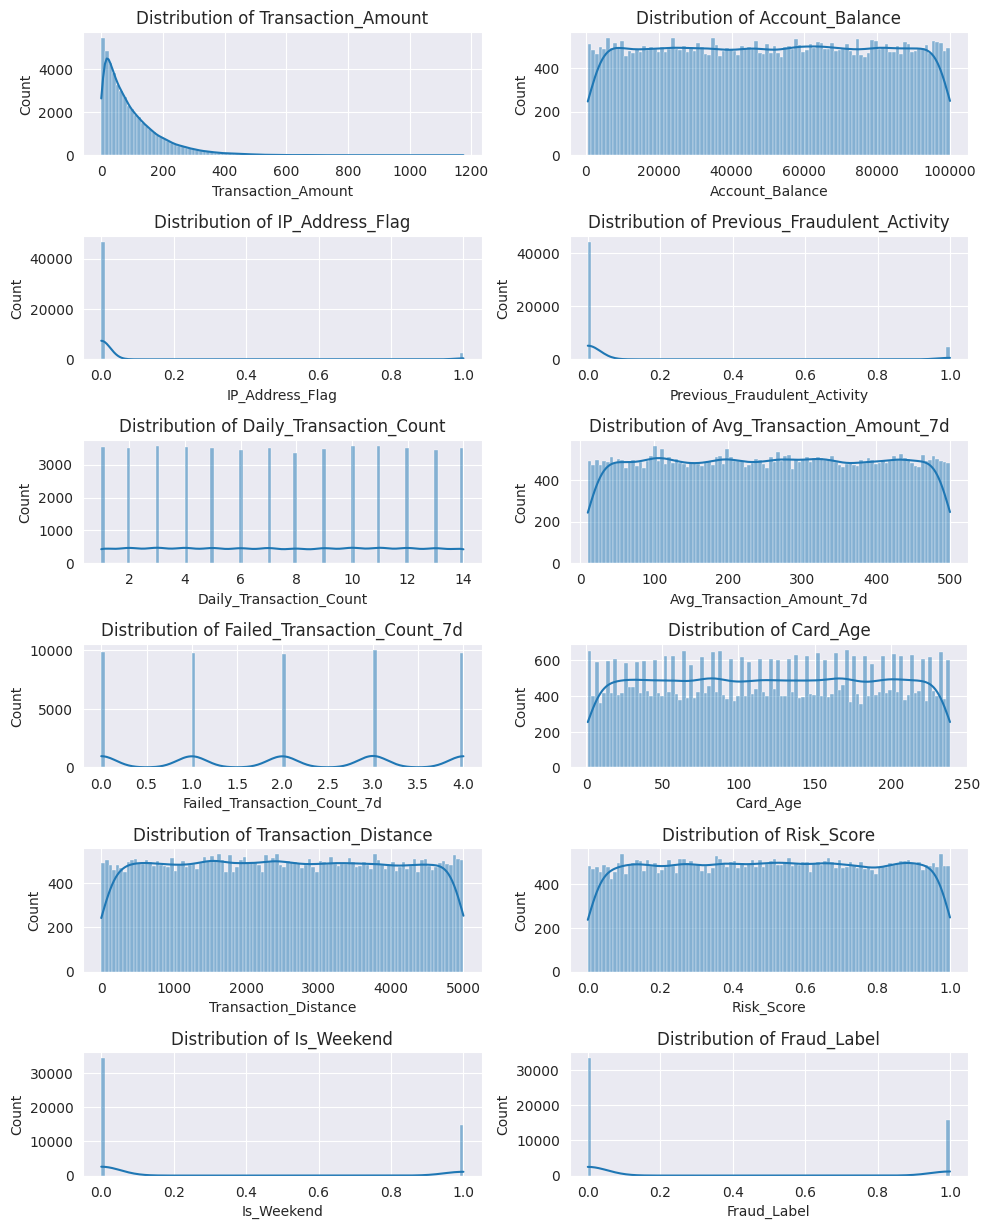

In [13]:
plot_numeric_distributions(df)